In [45]:
#installations
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [82]:
#((xtrain, ytrain), (xtest, ytest)) = mnist.load_data()
#((xtrain, ytrain), (xtest, ytest)) = cifar10.load_data()

train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')


xtrain = train_data.drop('label', axis=1)
xtest = test_data.drop('label', axis=1)

ytrain = train_data['label']
ytest =  test_data['label']

xtrain=np.array(xtrain)
xtest=np.array(xtest)

In [83]:



xtrain = xtrain.reshape((xtrain.shape[0], 28*28*1))
xtest = xtest.reshape((xtest.shape[0], 28*28*1))
xtrain = xtrain.astype("float") / 255.0
xtest = xtest.astype("float") / 255.0

In [84]:
lb = LabelBinarizer()
ytrain = lb.fit_transform(ytrain)
ytest = lb.transform(ytest)

In [85]:
model = Sequential()
model.add(Dense(128, input_shape = (784, ), activation = "sigmoid"))
model.add(Dense(64, activation = "sigmoid"))
model.add(Dense(10, activation = "softmax"))

In [86]:
sgd = SGD(0.01)
epo = 11
model.compile(loss = "categorical_crossentropy", optimizer = sgd, metrics = ['accuracy'])
H = model.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs = epo, batch_size = 128)

Epoch 1/11
469/469 [==============================] - 7s 5ms/step - loss: 2.2818 - accuracy: 0.1685 - val_loss: 2.2497 - val_accuracy: 0.2734
Epoch 2/11
469/469 [==============================] - 2s 4ms/step - loss: 2.2208 - accuracy: 0.3473 - val_loss: 2.1866 - val_accuracy: 0.5083
Epoch 3/11
469/469 [==============================] - 2s 4ms/step - loss: 2.1490 - accuracy: 0.4758 - val_loss: 2.1010 - val_accuracy: 0.5361
Epoch 4/11
469/469 [==============================] - 2s 4ms/step - loss: 2.0485 - accuracy: 0.5469 - val_loss: 1.9806 - val_accuracy: 0.5685
Epoch 5/11
469/469 [==============================] - 2s 4ms/step - loss: 1.9108 - accuracy: 0.5911 - val_loss: 1.8217 - val_accuracy: 0.6157
Epoch 6/11
469/469 [==============================] - 2s 4ms/step - loss: 1.7410 - accuracy: 0.6377 - val_loss: 1.6386 - val_accuracy: 0.6729
Epoch 7/11
469/469 [==============================] - 2s 4ms/step - loss: 1.5575 - accuracy: 0.6811 - val_loss: 1.4537 - val_accuracy: 0.7105
Epoch 

In [87]:
predications = model.predict(xtest, batch_size=10)
print(classification_report(ytest.argmax(axis = 1), predications.argmax(axis = 1)))

1000/1000 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       980
           1       0.81      0.98      0.89      1135
           2       0.83      0.73      0.78      1032
           3       0.73      0.83      0.78      1010
           4       0.69      0.85      0.76       982
           5       0.82      0.52      0.64       892
           6       0.85      0.90      0.87       958
           7       0.82      0.88      0.85      1028
           8       0.80      0.66      0.72       974
           9       0.75      0.57      0.65      1009

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.78     10000
weighted avg       0.80      0.79      0.79     10000



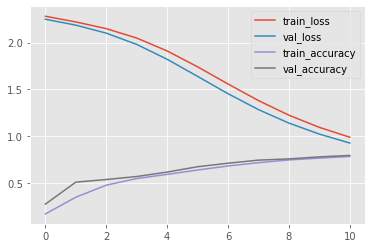

In [88]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epo), H.history["loss"], label = "train_loss")
plt.plot(np.arange(0, epo), H.history["val_loss"], label = "val_loss")
plt.plot(np.arange(0, epo), H.history["accuracy"], label = "train_accuracy")
plt.plot(np.arange(0, epo), H.history["val_accuracy"], label = "val_accuracy")
plt.legend()